### Setting paths and imports

In [1]:
import sys
import os
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'c:\\Projects\\AIIM\\gretel-demo\\GRETEL'

In [2]:
os.chdir(module_path)

In [3]:
from src.utils.context import Context
from src.data_analysis.future.data_analyzer import DataAnalyzer as data_analyzer
from src.evaluation.future.evaluator_manager_triplets import EvaluatorManager

In [4]:
config_f_name = 'trisqr_trsqr-oracle_obs.json'

### Evaluating the explainer

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 1
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")

context.logger.info("Creating the evaluators......................................................")
eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()

Generating context for: c:\Projects\AIIM\gretel-demo\GRETEL\lab\config\trisqr_trsqr-oracle_obs.json
,-1032686955 | INFO | 22488 - Executing: c:\Projects\AIIM\gretel-demo\GRETEL\lab\config\trisqr_trsqr-oracle_obs.json Run: 1
,-1032686938 | INFO | 22488 - Creating the evaluation manager....................................
,-1032686922 | INFO | 22488 - Creating the evaluators......................................................
,-1032686837 | INFO | 22488 - Loading: TringlesSquares-f7b2a0a3e3f64150c902bc187d23ef0b
,-1032686774 | INFO | 22488 - Created: TringlesSquares-f7b2a0a3e3f64150c902bc187d23ef0b
,-1032686724 | INFO | 22488 - Creating: TrianglesSquaresOracle-1f8eef29db5fcc0d522efb2defca9f2f
,-1032686687 | INFO | 22488 - TrianglesSquaresOracle trained in: 0.0 secs
,-1032686651 | INFO | 22488 - Saved: TrianglesSquaresOracle-1f8eef29db5fcc0d522efb2defca9f2f
,-1032686627 | INFO | 22488 - Created: TrianglesSquaresOracle-1f8eef29db5fcc0d522efb2defca9f2f
,-1032686611 | INFO | 22488 - Instan

### Aggregating the stats

In [6]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

,scope,dataset,oracle,explainer,Runtime,Runtime-std,GraphEditDistance,GraphEditDistance-std,Correctness,Correctness-std,OracleCalls,OracleCalls-std,OracleAccuracy,OracleAccuracy-std,Sparsity,Sparsity-std,Fidelity,Fidelity-std,Instability,Instability-std
0,demo-ecml-pkdd,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,TreeCyclesOracle-8f8e216deff127e0218ff13e1490c1a2,ObliviousBidirectionalSearchExplainer,0.379663,0.0,1.250000,0.0,0.923077,0.0,279.538462,0.0,1.0,0.0,0.029765,0.0,0.923077,0.0,1.022549,0.0
1,demo-ecml-pkdd,TringlesSquares-f7b2a0a3e3f64150c902bc187d23ef0b,TrianglesSquaresOracle-1f8eef29db5fcc0d522efb2...,DCESExplainer,0.020725,0.0,2.000000,0.0,1.000000,0.0,129.000000,0.0,1.0,0.0,0.401042,0.0,1.000000,0.0,0.000000,0.0
2,xai-ens,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,TreeCyclesOracle-8f8e216deff127e0218ff13e1490c1a2,ExplanationBidirectionalSearch,5.706859,0.0,1.230769,0.0,1.000000,0.0,1621.230769,0.0,1.0,0.0,0.029307,0.0,1.000000,0.0,1.016412,0.0
3,xai-ens,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,TreeCyclesOracle-8f8e216deff127e0218ff13e1490c1a2,ObliviousBidirectionalSearchExplainer,0.029799,0.0,1.461538,0.0,1.000000,0.0,68.461538,0.0,1.0,0.0,0.034780,0.0,1.000000,0.0,1.017029,0.0


### Visualizing individual instances

In [7]:
evaluator = eval_manager.evaluators[0]
evaluator

#### Square Instance

In [8]:
instance_id = 2

exp = evaluator.explanations[instance_id]
og_inst = exp.input_instance
cf_inst = exp.counterfactual_instances[0]

In [9]:
changes = data_analyzer.get_cf_changes(og_inst, cf_inst, False)

for action, elements in changes.items():
    print(f'{action}: {elements}') 

common nodes: [0, 1, 2]
common edges: [(0, 1), (1, 2)]
added nodes: []
added edges: [(0, 2)]
removed nodes: [3]
removed edges: [(0, 3), (2, 3)]


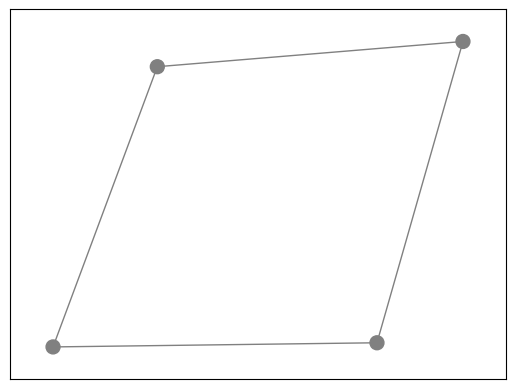

In [10]:
pos = data_analyzer.draw_graph(og_inst)

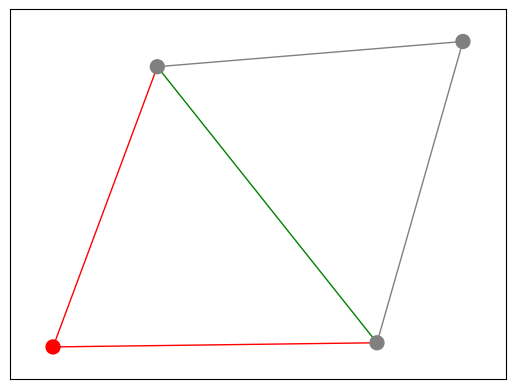

In [11]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)

#### Triange instance

In [12]:
instance_id = 8

exp = evaluator.explanations[instance_id]
og_inst = exp.input_instance
cf_inst = exp.counterfactual_instances[0]

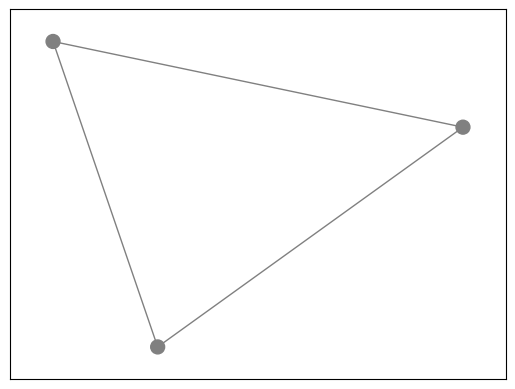

In [13]:
pos = data_analyzer.draw_graph(og_inst)

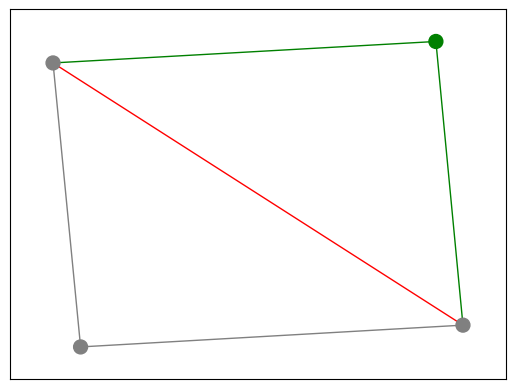

In [14]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst)